In [31]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pydataset as pdat
from math import sqrt
import env
alpha = 0.05

# hypothesis testing exercises

- Has the network latency gone up since we switched internet service providers?

$H_0$ : $\mu_0 = \mu_1$ where $\mu_t$ is the mean latency for a given time period, $t$. Network latency has not increased

$H_a$ : $\mu_0 \neq \mu_1$ Network latency has changed

True positive : The latency has changed, and it has

True negative : The latency has not changed, and it hasn't 

Type I Error : Thinking that the latency has changed when it has not.

Type II Error : Think that the latency is the same, when it is no longer the same.
 
 
- Is the website redesign any good?

Let $\mu_k$ be the mean daily site visits at time period $k$

$H_0$ : $\mu_0 = \mu_1$ - the mean daily site vist length hasn't changed

$H_a$ : $\mu_0 \neq \mu_1$ mean daily site visits have changed

True positive : site visit length has changed, and it has

True negative : site visit length has not changed, and it hasn't

Type I Error : The design change is good (site vist length has changed) when it has no effect

Type II Error : The design change had no effect, when it has had an effect


- Is our television ad driving more sales?

Let $\mu_g$ be average sales in $g$, a tv media market

$H_0$ : $\mu_g = \mu_{g'}$

Alt: $H_0$ : $s_0 \leq s_1$ where $s_t$ is the sales volumes at time $t$. w/ $H_a$ : $s_0 > s_1$

$H_a$ : $\mu_g \neq \mu_{g'}$

True positive : ad has had some effect on sales

True negative : ad has had no effect on sales

Type I Error : ad has an effect on sales, but is assumed not to have had an effect

Type II Error :  ad has no effect, but in fact changed sales

## T-Test

1.

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [ ]:
#office 1 stats
size_office_1 = 40
mu_office_1 = 90
sigma_office_1 = 15

#office 2 stats
size_office_2 = 50
mu_office_2 = 100
sigma_office_2 = 20

alpha = 0.05

In [ ]:
# can visualize these distributions
x = np.arange(50, 150)
y1 = stats.norm(mu_office_1, sigma_office_1).pdf(x)
y2 = stats.norm(mu_office_2, sigma_office_2).pdf(x)

plt.plot(x, y1)
plt.plot(x, y2)

$H_0$ : mu_office_1 = mu_office_2

$H_a$ : mu_office_1 $\neq$ mu_office_2

In [ ]:
# calculate the t stat and the p value
t, p = stats.ttest_ind_from_stats(mu_office_1, sigma_office_1, size_office_1, mu_office_2, sigma_office_2, size_office_2, equal_var = False)

In [ ]:
t, p

In [ ]:
# take p since this is a two tail test
p < alpha

There are grounds to reject $H_0$. The sales time is different at the two offices.

2.

Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?



In [ ]:
from pydataset import data
df_mpg = data('mpg')
df_mpg['f_ef'] = (df_mpg.cty + df_mpg.hwy)/2
# can use the harmonic mean, probs is more accurate
df_mpg['f_ef'] = stats.hmean(df_mpg[{'cty', 'hwy'}], axis =1)
df_mpg

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

$H_0$ : $\mu_{2008} = \mu_{1999}$

$H_a$ :$\mu_{2008} \neq \mu_{1999}$

$\alpha$ = 0.05

In [ ]:
#make the two series sets:
fe_2008 = df_mpg[df_mpg.year==2008].f_ef
fe_1999 = df_mpg[df_mpg.year==1999].f_ef
fe_2008.mean(), fe_1999.mean()

In [ ]:
# compare variance:
fe_2008.var(), fe_1999.var()

In [ ]:
s, p = stats.levene(fe_2008, fe_1999)
p < 0.05 #we will use equal_var=True

In [ ]:
# this is a two tailed test so can keep p as is
t, p = stats.ttest_ind(fe_2008, fe_1999, equal_var = True)
t, p

In [ ]:
p < alpha

In [ ]:
fe_2008.hist()

In [ ]:
fe_1999.hist()

It is unlikely that the fuel efficiency has changed. $H_0$ is not rejected

- Are compact cars more fuel-efficient than the average car?

$H_0$ : $\mu_{compact} \leq \mu$

$H_a$ : $\mu_{compact} > \mu$

Where $\mu$ is mpg for average car

This is a one-sample t-test

In [ ]:
#make two series and look at their mean
compact = df_mpg[df_mpg['class'] == 'compact'].f_ef
population = df_mpg.f_ef
compact.mean(), population.mean()

In [ ]:
plt.hist([compact, population])

In [ ]:
#this a single tail test since H_0 contains <=
# will take p/2
t, p = stats.ttest_1samp(compact, population.mean())
t, p/2

In [ ]:
p/2 < alpha

It is likely that compact cars are more fuel efficient than non-compact cars.  $H_0$ can be reasonably rejected.

- Do manual cars get better gas mileage than automatic cars?

$H_0$ : $\mu_{manual} \leq \mu_{automatic}$

$H_a$ : $\mu_{manual} > \mu_{automatic}$

In [ ]:
# make two series and look at their mean
automatic = df_mpg[df_mpg.trans.str.contains('auto')].f_ef
manual = df_mpg[df_mpg.trans.str.contains('manual')].f_ef
manual.mean(), automatic.mean()

In [ ]:
manual.shape, automatic.shape

In [ ]:
manual.hist()

In [ ]:
automatic.hist()

In [ ]:
#compare variance
s, p = stats.levene(manual, automatic)
p < 0.05 #equal_var = True

In [ ]:
#This is a single tail test, use p/2
t, p = stats.ttest_ind(manual, automatic, equal_var = True)
t, p

In [ ]:
p/2 < alpha

It is likely that manual cars get better gas mileage than automatic. $H_0$ is likely untrue.

### the above used an avg of city and highway efficiency.  this might effect the results
re-run the test with just one of city or highway

$H_0$ : $\mu_{08hwy} = \mu_{99hwy}$

$H_a$ : $\mu_{08hwy} \neq \mu_{99hwy}$

In [ ]:
#make the two series sets:
fe_2008 = df_mpg[df_mpg.year==2008].hwy
fe_1999 = df_mpg[df_mpg.year==1999].hwy
fe_2008.mean(), fe_1999.mean()

In [ ]:
# compare variance:
fe_2008.var(), fe_1999.var()
s, p = stats.levene(fe_2008, fe_1999)
p < 0.05 #we will use equal_var=True

In [ ]:
# this is a two tailed test so can keep p as is
t, p = stats.ttest_ind(fe_2008, fe_1999, equal_var = True)
p < alpha

cannot reject $H_0$

$H_0$ : $\mu_{08city} = \mu_{99city}$

$H_a$ : $\mu_{08city} \neq \mu_{99city}$

In [ ]:
#make the two series sets:
fe_2008 = df_mpg[df_mpg.year==2008].cty
fe_1999 = df_mpg[df_mpg.year==1999].cty
fe_2008.mean(), fe_1999.mean()

In [ ]:
# compare variance:
fe_2008.var(), fe_1999.var()
s, p = stats.levene(fe_2008, fe_1999)
p < 0.05 #we will use equal_var=True

In [ ]:
# this is a two tailed test so can keep p as is
t, p = stats.ttest_ind(fe_2008, fe_1999, equal_var = True)
p < alpha

Cannot reject $H_0$

## correlation

1. 


Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [123]:
# get the data
tl = pd.read_csv('churn_data.csv')
tl.head(3)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,avg_monthly_charges,avg_bool_check,contract_type.1,phone_type,internet_type
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,...,False,True,True,True,3,65.6,TRUE,1 Year,One Line,DSL
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,...,False,True,True,True,0,59.9,TRUE,Month-to-Month,Two or More Lines,Fiber Optic
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,...,True,True,True,True,0,73.9,TRUE,Month-to-Month,One Line,DSL


In [124]:
tl.columns

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service', 'internet_service', 'contract_type', 'payment_type',
       'monthly_charges', 'total_charges', 'churn', 'tenure', 'rounded_tenure',
       'service_type', 'is_female', 'has_churned', 'has_phone', 'has_internet',
       'has_phone_and_internet', 'partner_dependents', 'avg_monthly_charges',
       'avg_bool_check', 'contract_type.1', 'phone_type', 'internet_type'],
      dtype='object')

In [125]:
# get only the interesting columns
tl = tl[['customer_id', 'monthly_charges','tenure', 'total_charges', 'phone_type', 'internet_type', 'service_type']]
tl.sample(3)

,customer_id,monthly_charges,tenure,total_charges,phone_type,internet_type,service_type
4706,6630-UJZMY,83.25,3.7,308.05,Two or More Lines,Fiber Optic,internet+phone
5403,7613-LLQFO,84.45,12.5,1059.55,Two or More Lines,Fiber Optic,internet+phone
5295,7479-NITWS,89.35,7.1,631.85,Two or More Lines,Fiber Optic,internet+phone


- Does tenure correlate with monthly charges?

In [126]:
#get the two series objects to work with
mnt = tl.monthly_charges
tnr = tl.tenure

n = mnt.size # get number of observations (these happen to be the same in these series)
degf = n - 2 #taken from the lesson
conf_int = 0.95 #chance of no type I error - i.e. chance of not incorrectly rejecting H_0
alpha = 1 - conf_int #chance of a type I error

$H_0$ : there is no linear correlation between tenure and monthly charges - $r \approx 0$

$H_a$ : there is a linear correlation between tenure and monthly charges - $r \neq 0$

In [127]:
# calculate r
nom_r = ((mnt - mnt.mean())*(tnr - tnr.mean())).sum()/n
den_r = mnt.std()*tnr.std()
r = nom_r/den_r
r

0.24714982558905937

In [128]:
# calculate the t value
nom_t = r*(sqrt(degf))
den_t = sqrt(1-r**2)
t = nom_t/den_t
t

21.411586673862747

In [129]:
# get a p-value - since it is not equals we do a two tail test; multiply by 2
p = stats.t.sf(t, df = degf) * 2
p

1.3674422214803312e-98

In [130]:
p < alpha

True

It is likely that $H_0$ is false; thus there is a correllation between tenure and monthly charges.

Do the same the easy way:

In [173]:
r, p = stats.pearsonr(mnt, tnr)
r, p # why are these numbers slightly different?

(0.2471848922499011, 1.2811368994929208e-98)

In [132]:
p*2 < alpha

True

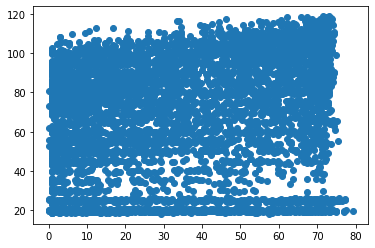

In [133]:
plt.scatter(x= tnr, y=mnt)

- Total charges? 

$H_0$ : tenure and total charges are not correlated; $r \approx 0$

$H_a$ : tenure and total charges are correlated

In [134]:
# get the total charges series
tl[tl.total_charges.isna()]
#there are a few rows with NaN. these are where the tenure was less than a month.
#set these to 0

,customer_id,monthly_charges,tenure,total_charges,phone_type,internet_type,service_type
945,1371-DWPAZ,56.05,0.0,NaN,No Phone Service,No Internet Service,internet
1731,2520-SGTTA,20.00,0.0,NaN,One Line,DSL,phone
1906,2775-SEFEE,61.90,0.0,NaN,Two or More Lines,Fiber Optic,internet+phone
2025,2923-ARZLG,19.70,0.0,NaN,One Line,DSL,phone
2176,3115-CZMZD,20.25,0.0,NaN,One Line,DSL,phone
2250,3213-VVOLG,25.35,0.0,NaN,Two or More Lines,Fiber Optic,phone
2855,4075-WKNIU,73.35,0.0,NaN,Two or More Lines,Fiber Optic,internet+phone
3052,4367-NUYAO,25.75,0.0,NaN,Two or More Lines,Fiber Optic,phone
3118,4472-LVYGI,52.55,0.0,NaN,No Phone Service,No Internet Service,internet
4054,5709-LVOEQ,80.85,0.0,NaN,One Line,DSL,internet+phone


In [135]:
tl.total_charges.replace(np.NaN, 0, inplace = True)
tl[tl.total_charges.isna()]

,customer_id,monthly_charges,tenure,total_charges,phone_type,internet_type,service_type


In [136]:
#Get total charges column
tch = tl.total_charges
tch

0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7044     742.90
7045    1873.70
7046      92.75
7047    4627.65
7048    3707.60
Name: total_charges, Length: 7049, dtype: float64

In [137]:
# get r and p
r, p = stats.pearsonr(tch, tnr)
r, p

(0.826117195298786, 0.0)

In [138]:
p < alpha

True

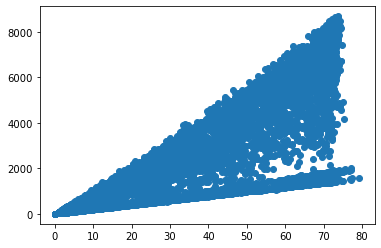

In [139]:
#correlation is clear from the scatter plot
plt.scatter(x=tnr, y=tch)

There is a good probabilty that $H_0$ is false.

- What happens if you control for phone and internet service?

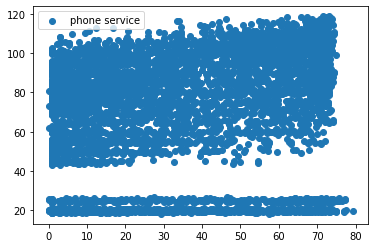

In [140]:
# control for phone service
# plot the three type of phone service against monthly charges
plt.scatter(data = tl[(tl.phone_type=='One Line') | (tl.phone_type=='Two or More Lines')], y = 'monthly_charges', x = 'tenure', label='phone service')

plt.legend()

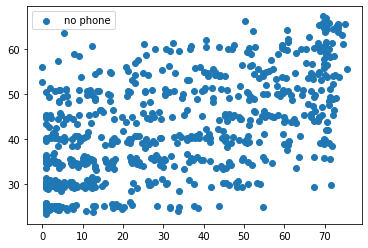

In [141]:
plt.scatter(data = tl[tl.phone_type=='No Phone Service'], y = 'monthly_charges', x = 'tenure', label = 'no phone')
plt.legend()
# looks like there might be a difference

In [142]:
# correlation for no phone service
r_nophone, p_nophone = stats.pearsonr(tl[tl.phone_type == 'No Phone Service'].tenure, tl[tl.phone_type == 'No Phone Service'].monthly_charges)
r_nophone, p_nophone

(0.586289220343008, 2.6999797925087894e-64)

In [143]:
# correlation for one phone line
r_phone, p_phone = stats.pearsonr(tl[(tl.phone_type=='One Line') | (tl.phone_type=='Two or More Lines')].tenure, tl[(tl.phone_type=='One Line') | (tl.phone_type=='Two or More Lines')].monthly_charges)
r_phone, p_phone

(0.244389315983649, 3.2084381976268973e-87)

There appears to be a stronger correlation between tenure and monthly charges for customers without phone service.

Now do internet service:

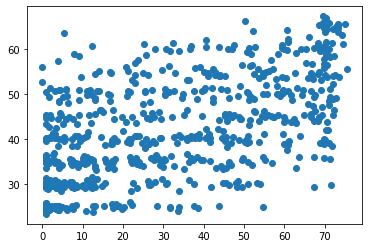

In [144]:
#customers without internet
plt.scatter(data = tl[tl.internet_type == 'No Internet Service'], x = 'tenure', y = 'monthly_charges')

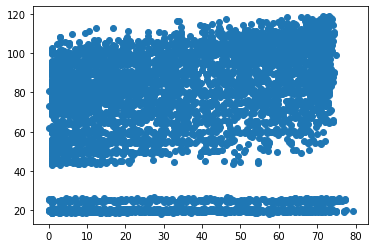

In [145]:
#customers with internet service
plt.scatter(data = tl[tl.internet_type != 'No Internet Service'], x = 'tenure', y = 'monthly_charges')

In [146]:
#customers without internet
r_noint, p_noint = stats.pearsonr(tl[tl.internet_type == 'No Internet Service'].tenure, tl[tl.internet_type == 'No Internet Service'].monthly_charges)
r_noint, p_noint

(0.586289220343008, 2.6999797925087894e-64)

In [147]:
#customers with internet
r_int, p_int = stats.pearsonr(tl[tl.internet_type != 'No Internet Service'].tenure, tl[tl.internet_type != 'No Internet Service'].monthly_charges)
r_int, p_int

(0.244389315983649, 3.2084381976268973e-87)

There may be a stronger correlation between tenure and monthly charges among customers without internet services.

internet+phone    4837
phone             1529
internet           683
Name: service_type, dtype: int64

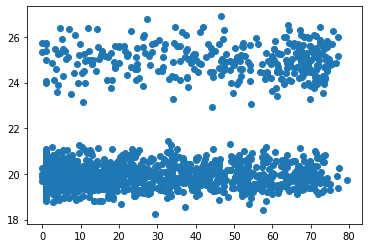

In [157]:
#only use the phone only (no internet)
plt.scatter(data=tl[tl.service_type=='phone'], x = 'tenure', y= 'monthly_charges')
tl.service_type.value_counts()

In [154]:
r_phoneonly, p_phoneonly = stats.pearsonr(tl[tl.service_type=='phone'].monthly_charges, tl[tl.service_type=='phone'].tenure)
r_phoneonly, p_phoneonly

(0.3424305495562668, 2.6128072466405888e-43)

In [158]:
r_intonly, p_intonly = stats.pearsonr(tl[tl.service_type=='internet'].monthly_charges, tl[tl.service_type=='internet'].tenure)
r_intonly, p_intonly

(0.586289220343008, 2.6999797925087894e-64)

2.


Use the employees database.

- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [90]:
# note on the query. Checking the employees with multiple rows shows that tenure and salary were 
# the same.  Use max() to aggregate these rows for the GROUP BY emp_no so that COUNT can be used
# on t.titles
query = '''
SELECT e.emp_no, MAX(DATEDIFF(IF(de.to_date <= NOW(), de.to_date, NOW()), hire_date)) AS tenure, MAX(s.salary) AS salary, COUNT(t.title) AS title_count
	FROM employees AS e
		JOIN dept_emp AS de USING (emp_no)
        JOIN salaries AS s USING (emp_no)
        JOIN titles AS t USING (emp_no)
	WHERE s.to_date > NOW() AND de.to_date > NOW()
    GROUP BY e.emp_no;
'''

df_emp = pd.read_sql_query(query, env.get_db_url('employees'))

In [91]:
#some employees are repeating
df_emp

,emp_no,tenure,salary,title_count
0,10001,13101,88958,1
1,10002,13318,72527,1
2,10003,13038,43311,1
3,10004,12943,74057,2
4,10005,11927,94692,2
...,...,...,...,...
240119,499995,10709,52868,1
240120,499996,11547,69501,2
240121,499997,13167,83441,2
240122,499998,10435,55003,2


- Is there a relationship between how long an employee has been with the company and their salary?

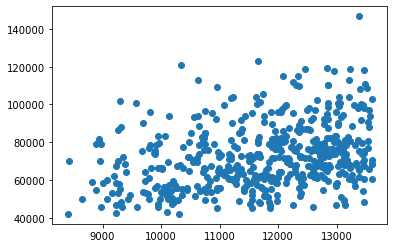

In [172]:
#chart the date. use a subset so that the graph is easier to read
plt.scatter(data = df_emp.sample(500), x='tenure', y='salary')
#vaguely maybe looks like there is a relationship

$H_0$ : $r \approx 0$, there is no correlation between tenure and salary

$H_a$ : $r \neq 0$, there is a correlation

In [93]:
r, p = stats.pearsonr(df_emp.tenure, df_emp.salary)
r, p

(0.30646256131860894, 0.0)

The p value is not actually 0, but it is very small because the n > 200,000.

There are grounds to reject $H_0$, but it is not a strong correlation

- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

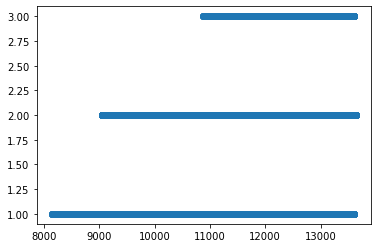

In [98]:
plt.scatter(data = df_emp, x='tenure', y='title_count')

$H_0$ : There is no correlation between tenure and number of titles

$H_a$ : There is a correlation between tenure and number of titles

In [99]:
r, p = stats.pearsonr(df_emp.tenure, df_emp.title_count)
r, p

(0.2871267889699541, 0.0)

p here is so low that it isn't displayable
There is a high probability that $H_0$ is false.

3.


Use the sleepstudy data. Is there a relationship between days and reaction time?

In [108]:
df_sleep = pdat.data('sleepstudy')
df_sleep

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


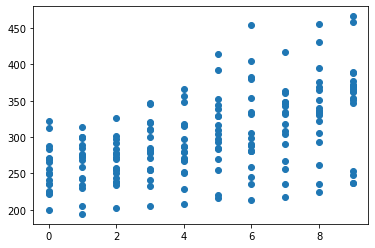

In [109]:
plt.scatter(data = df_sleep, x = 'Days', y = 'Reaction')

$H_0$ : There is no correlation between days and reaction time

$H_a$ :  There is a correlation between days and reaction time

In [112]:
r, p = stats.pearsonr(df_sleep['Days'], df_sleep['Reaction'])
r, p

(0.5352302262650253, 9.894096322214812e-15)

In [113]:
p < alpha

True

$H_0$ is likely not true.  The correlation is fairly strong.

## $χ^2$ tests

- Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

$H_0$ : Being a codeup student and using a macbook are independent of each other

In [15]:
crosstab = pd.DataFrame(index = ['uses a macbook', 'doesn\'t use a macbook'], columns = ['codeup student', 'not codeup student'])
crosstab['codeup student'] = [49, 1]
crosstab['not codeup student'] = [20, 30]
crosstab

,codeup student,not codeup student
uses a macbook,49,20
doesn't use a macbook,1,30


In [16]:
chi2, p, degf, expected = stats.chi2_contingency(crosstab)
p

1.4116760526193828e-09

$H_0$ is likely false

- Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [20]:
mpg = pdat.data('mpg')
mpg.sample(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
94,ford,mustang,4.0,2008,6,auto(l5),r,16,24,r,subcompact
78,ford,explorer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv
56,dodge,dakota pickup 4wd,5.2,1999,8,manual(m5),4,11,17,r,pickup


$H_0$ : manufacturer and automatic/non-automatic are independent

In [24]:
mpg['automatic'] = mpg.trans.str.contains('auto')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,True
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,True
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,False
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,True
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,False


In [36]:
observed = pd.crosstab(mpg.manufacturer, mpg.automatic)
observed

automatic,False,True
manufacturer,,
audi,7,11
chevrolet,3,16
dodge,7,30
ford,8,17
honda,5,4
hyundai,7,7
jeep,0,8
land rover,0,4
lincoln,0,3


In [33]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p, p < alpha

(0.00953444310358795, True)

There are grounds to reject $H_0$ - it is likely that manufacturer and automatic are dependent
Noting that in the cross tab, some manufacturers have no manual cars

$H_0$ : class and drv are independent

In [34]:
observed = pd.crosstab(mpg['class'], mpg['drv'])
observed

drv,4,f,r
class,,,
2seater,0,0,5
compact,12,35,0
midsize,3,38,0
minivan,0,11,0
pickup,33,0,0
subcompact,4,22,9
suv,51,0,11


In [35]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p, p < alpha

(1.104881117447524e-40, True)

There are grounds to reject $H_0$ - it is likely that class and drv are dependent

- Use the data from the employees database to answer these questions:
    - Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
    - Is an employee's gender independent of whether or not they are or have been a manager?



In [45]:
query = '''
SELECT emp_no, gender, dept_name, IF(emp_no IN (SELECT emp_no FROM dept_manager), 'True', 'False') AS manager_bool
	FROM employees
		JOIN dept_emp USING (emp_no)
        JOIN departments USING (dept_no)
	WHERE to_date > NOW();
'''
df_emp = pd.read_sql_query(query, env.get_db_url('employees'))
df_emp

,emp_no,gender,dept_name,manager_bool
0,10038,M,Customer Service,False
1,10049,F,Customer Service,False
2,10060,M,Customer Service,False
3,10088,F,Customer Service,False
4,10112,F,Customer Service,False
...,...,...,...,...
240119,499966,F,Sales,False
240120,499976,M,Sales,False
240121,499980,M,Sales,False
240122,499986,F,Sales,False


In [46]:
df_emp.info() #looks like manager bool is entered as a string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   emp_no        240124 non-null  int64 
 1   gender        240124 non-null  object
 2   dept_name     240124 non-null  object
 3   manager_bool  240124 non-null  object
dtypes: int64(1), object(3)
memory usage: 7.3+ MB


- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [86]:
#make a boolean column for sales and marketing
df_emp['sales_marketing_bool'] = df_emp.dept_name.isin(['Sales', 'Marketing'])
df_emp

,emp_no,gender,dept_name,manager_bool,sales_marketing_bool
0,10038,M,Customer Service,False,False
1,10049,F,Customer Service,False,False
2,10060,M,Customer Service,False,False
3,10088,F,Customer Service,False,False
4,10112,F,Customer Service,False,False
...,...,...,...,...,...
240119,499966,F,Sales,False,True
240120,499976,M,Sales,False,True
240121,499980,M,Sales,False,True
240122,499986,F,Sales,False,True


$H_0$ : sales and marketing employees are independent of gender

In [98]:
#make a crosstab
df_marketing_sales = df_emp[df_emp.sales_marketing_bool]
observed = pd.crosstab(df_marketing_sales.gender, df_marketing_sales.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [99]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(0.3240332004060638,
 0.5691938610810126,
 1,
 array([[ 5893.2426013, 14969.7573987],
        [ 8948.7573987, 22731.2426013]]))

In [100]:
p, p < alpha

(0.5691938610810126, False)

$H_0$ is likely true. gender is indpendent of being a sales and marketing employee

- Is an employee's gender independent of whether or not they are or have been a manager?

$H_0$ : gender and being a manager are independent

In [91]:
#make a crosstab
observed = pd.crosstab(df_emp.gender, df_emp.manager_bool)
observed

manager_bool,False,True
gender,,
F,95997,13
M,144103,11


In [92]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(1.4644053674773516,
 0.22623047939647867,
 1,
 array([[9.60004040e+04, 9.59604204e+00],
        [1.44099596e+05, 1.44039580e+01]]))

In [93]:
p, p < alpha

(0.22623047939647867, False)

$H_0$ is likely true.  Being a manager and being a gender are independent